In [1]:
# Load libraries

import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

########
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [2]:
## Load Dataset

filename = 'winequality-white.csv'
names = ["FXAC", "VAC", "CTA", "RSUG", "CHL", "FSO2", "TSO2", "DEN", "pH", "SUL", "ALC", "QUAL"]
dataset = read_csv(filename, names=names)

# "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide",
# "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"

In [3]:
# Dataset Descriptive StatisticsData 

print(dataset.shape)
print("===============================================================================")

print(dataset.head(20))
print("===============================================================================")

print(dataset.describe())
print("===============================================================================")

print(dataset.groupby('QUAL').size())

(4898, 12)
    FXAC   VAC   CTA   RSUG    CHL  FSO2   TSO2     DEN    pH   SUL   ALC  \
0    7.0  0.27  0.36  20.70  0.045  45.0  170.0  1.0010  3.00  0.45   8.8   
1    6.3  0.30  0.34   1.60  0.049  14.0  132.0  0.9940  3.30  0.49   9.5   
2    8.1  0.28  0.40   6.90  0.050  30.0   97.0  0.9951  3.26  0.44  10.1   
3    7.2  0.23  0.32   8.50  0.058  47.0  186.0  0.9956  3.19  0.40   9.9   
4    7.2  0.23  0.32   8.50  0.058  47.0  186.0  0.9956  3.19  0.40   9.9   
5    8.1  0.28  0.40   6.90  0.050  30.0   97.0  0.9951  3.26  0.44  10.1   
6    6.2  0.32  0.16   7.00  0.045  30.0  136.0  0.9949  3.18  0.47   9.6   
7    7.0  0.27  0.36  20.70  0.045  45.0  170.0  1.0010  3.00  0.45   8.8   
8    6.3  0.30  0.34   1.60  0.049  14.0  132.0  0.9940  3.30  0.49   9.5   
9    8.1  0.22  0.43   1.50  0.044  28.0  129.0  0.9938  3.22  0.45  11.0   
10   8.1  0.27  0.41   1.45  0.033  11.0   63.0  0.9908  2.99  0.56  12.0   
11   8.6  0.23  0.40   4.20  0.035  17.0  109.0  0.9947  3.14  0.

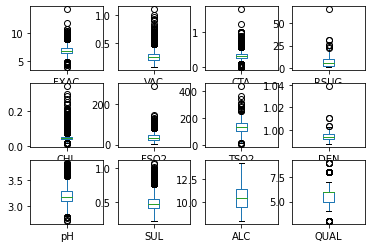

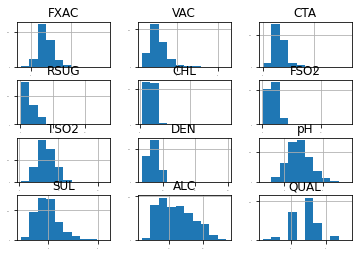

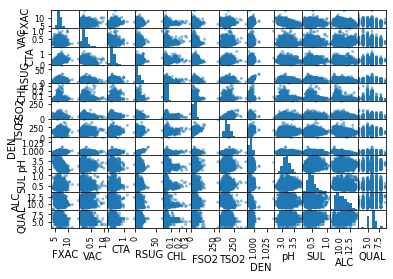

In [4]:
# Data Viz

dataset.plot(kind='box', layout=(3,4), subplots=True, sharex=False, sharey=False)
pyplot.show()
print("===============================================================================")

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()
print("===============================================================================")

scatter_matrix(dataset)
pyplot.show()


      FXAC   VAC       CTA  RSUG   CHL      FSO2      TSO2   DEN        pH  \
FXAC  1.00 -0.02  2.89e-01  0.09  0.02 -4.94e-02  9.11e-02  0.27 -4.26e-01   
VAC  -0.02  1.00 -1.49e-01  0.06  0.07 -9.70e-02  8.93e-02  0.03 -3.19e-02   
CTA   0.29 -0.15  1.00e+00  0.09  0.11  9.41e-02  1.21e-01  0.15 -1.64e-01   
RSUG  0.09  0.06  9.42e-02  1.00  0.09  2.99e-01  4.01e-01  0.84 -1.94e-01   
CHL   0.02  0.07  1.14e-01  0.09  1.00  1.01e-01  1.99e-01  0.26 -9.04e-02   
FSO2 -0.05 -0.10  9.41e-02  0.30  0.10  1.00e+00  6.16e-01  0.29 -6.18e-04   
TSO2  0.09  0.09  1.21e-01  0.40  0.20  6.16e-01  1.00e+00  0.53  2.32e-03   
DEN   0.27  0.03  1.50e-01  0.84  0.26  2.94e-01  5.30e-01  1.00 -9.36e-02   
pH   -0.43 -0.03 -1.64e-01 -0.19 -0.09 -6.18e-04  2.32e-03 -0.09  1.00e+00   
SUL  -0.02 -0.04  6.23e-02 -0.03  0.02  5.92e-02  1.35e-01  0.07  1.56e-01   
ALC  -0.12  0.07 -7.57e-02 -0.45 -0.36 -2.50e-01 -4.49e-01 -0.78  1.21e-01   
QUAL -0.11 -0.19 -9.21e-03 -0.10 -0.21  8.16e-03 -1.75e-01 -0.31

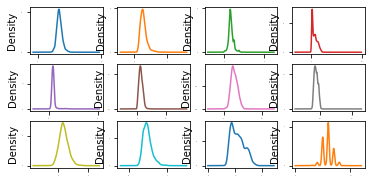

In [5]:
set_option('precision', 2) 
print(dataset.corr(method='pearson'))

print("===============================================================================")

dataset.plot(kind='density', subplots=True, layout=(4,4), 
             sharex=False, legend=False, fontsize=1)
pyplot.show()

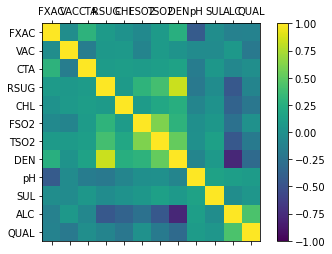

In [6]:
# correlation matrix

fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
ticks = numpy.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


In [7]:
# Split Dataset into train and test

array = dataset.values
X = array[: , :-1]
y = array[: , -1]

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=validation_size, 
                                                    random_state=seed
                                                   )

In [8]:
# Spot-Check Algorithms

models = list()
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate Each Model
results, names = list(), list()

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.520660 (0.024956)
LDA: 0.522449 (0.030443)
KNN: 0.468865 (0.026389)
CART: 0.596481 (0.026051)
NB: 0.441798 (0.023525)
SVM: 0.557939 (0.022355)


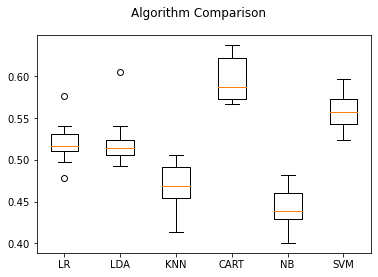

In [9]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [10]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(gamma='auto'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.529084 (0.030048)
ScaledLDA: 0.522449 (0.030443)
ScaledKNN: 0.542367 (0.024705)
ScaledCART: 0.593418 (0.034090)
ScaledNB: 0.438737 (0.022286)
ScaledSVM: 0.565595 (0.016789)


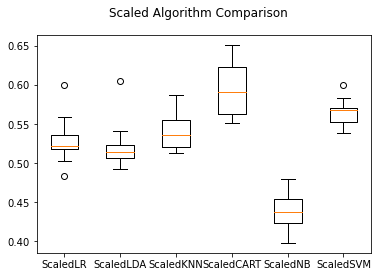

In [11]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [12]:
# Tune the CART to improve accuracy

params_dt = {
    'max_depth' : [3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'min_samples_leaf' : [0.02, 0.04, 0.06, 0.08, 0.10, 0.12],
    'max_features' : [0.2, 0.4, 0.6, 0.8, 1.0],
    'criterion' : ['gini', 'entropy']
}

grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=7), param_grid=params_dt, 
                      scoring='accuracy', cv=4, n_jobs=-1)

grid_dt.fit(X_train, Y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

print('Best CV accuracy', grid_dt.best_score_)

## CART accuracy reduced

Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 0.02}
Best CV accuracy 0.5303779887848908


In [13]:
# Tune scaled SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring='accuracy', cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, 
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.571206 using {'C': 1.7, 'kernel': 'rbf'}
0.515557 (0.026521) with: {'C': 0.1, 'kernel': 'linear'}
0.479574 (0.029569) with: {'C': 0.1, 'kernel': 'poly'}
0.524751 (0.018878) with: {'C': 0.1, 'kernel': 'rbf'}
0.493615 (0.029094) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.516578 (0.025742) with: {'C': 0.3, 'kernel': 'linear'}
0.499737 (0.027165) with: {'C': 0.3, 'kernel': 'poly'}
0.552831 (0.017979) with: {'C': 0.3, 'kernel': 'rbf'}
0.453549 (0.018133) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.517344 (0.025297) with: {'C': 0.5, 'kernel': 'linear'}
0.508420 (0.023236) with: {'C': 0.5, 'kernel': 'poly'}
0.556911 (0.019228) with: {'C': 0.5, 'kernel': 'rbf'}
0.429294 (0.022327) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.517344 (0.026058) with: {'C': 0.7, 'kernel': 'linear'}
0.512506 (0.019997) with: {'C': 0.7, 'kernel': 'poly'}
0.560487 (0.017437) with: {'C': 0.7, 'kernel': 'rbf'}
0.430823 (0.023098) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.517088 (0.026251) with: {'C': 0.9, 'kernel': 'linear'

In [14]:
# Ensemble Algorithms

ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, 
                                 scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.427263 (0.027444)
GBM: 0.583454 (0.022285)
RF: 0.640878 (0.026430)
ET: 0.649310 (0.016365)


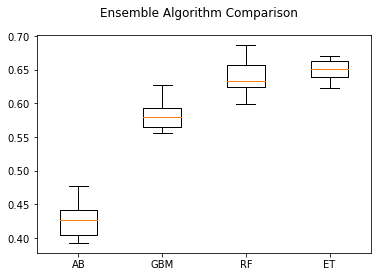

In [15]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [19]:
# Prepare the ET Model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(n_estimators=10)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset

rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.6683673469387755
[[  0   0   4   2   0   0   0]
 [  0   6  20  11   2   0   0]
 [  1   8 196  69   6   0   0]
 [  0   3  76 348  29   0   0]
 [  0   0  10  60  91   1   0]
 [  0   0   1  14   7  14   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         6
         4.0       0.35      0.15      0.21        39
         5.0       0.64      0.70      0.67       280
         6.0       0.69      0.76      0.72       456
         7.0       0.67      0.56      0.61       162
         8.0       0.93      0.39      0.55        36
         9.0       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.47      0.37      0.40       980
weighted avg       0.66      0.67      0.66       980



/Users/ezeamadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Prepare the ET Model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=10)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset

rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.6602040816326531
[[  0   0   2   3   1   0   0]
 [  1   6  18  13   1   0   0]
 [  0   6 205  64   5   0   0]
 [  2   2  95 323  34   0   0]
 [  0   0   5  56 100   1   0]
 [  0   0   1  12  10  13   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         6
         4.0       0.43      0.15      0.23        39
         5.0       0.63      0.73      0.68       280
         6.0       0.69      0.71      0.70       456
         7.0       0.66      0.62      0.64       162
         8.0       0.93      0.36      0.52        36
         9.0       0.00      0.00      0.00         1

    accuracy                           0.66       980
   macro avg       0.48      0.37      0.39       980
weighted avg       0.66      0.66      0.65       980



/Users/ezeamadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
